In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [2]:
red_army_size = int(input("Введите размер красной армии:"))
red_partisans_size = int(input("Введите количество красных партизан:"))
red_army_recruits = int(input("Введите количество новобранцев красной армии:"))

blue_army_size = int(input("Введите размер синей армии:"))
blue_partisans_size = int(input("Введите количество синих партизан:"))
blue_army_recruits = int(input("Введите количество новобранцев синей армии:"))

days = int(input("Введите срок моделирования:"))

In [47]:
red_army = {
    "size": [red_army_size],
    "losses": [0],
    "killed": [0],
    "wounded": [0],
    "recovered": [0],
    "efficiency_rate": [0],
    "mortality_rate": [0]
}
red_partisans = {
    "size": [red_partisans_size],
    "losses": [0],
    "killed": [0],
    "wounded": [0],
    "recovered": [0],
    "efficiency_rate": [0],
    "mortality_rate": [0]
}
blue_army = {
    "size": [blue_army_size],
    "losses": [0],
    "killed": [0],
    "wounded": [0],
    "recovered": [0],
    "efficiency_rate": [0],
    "mortality_rate": [0]
}
blue_partisans = {
    "size": [blue_partisans_size],
    "losses": [0],
    "killed": [0],
    "wounded": [0],
    "recovered": [0],
    "efficiency_rate": [0],
    "mortality_rate": [0]
}
army_recovery_rate = 0.5
partisans_recovery_rate = 0.1

In [48]:
time = np.arange(0, days)
step = 1

In [49]:
for t in time:
    t = int(t)
    if t != 0:
        prev_red_army = {
            "size": red_army["size"][t - 1]
        }
        prev_red_partisans = {
            "size": red_partisans["size"][t - 1]
        }
        prev_blue_army = {
            "size": blue_army["size"][t - 1]
        }
        prev_blue_partisans = {
            "size": blue_partisans["size"][t - 1]
        }

        # Расчет коэффициентов в момент времени
        weather_rate = rd.randrange(0, 100, 5) / 100
        
        red_army["efficiency_rate"].append(((prev_red_army["size"] / red_army["size"][0]) + weather_rate) * 0.25)
        red_partisans["efficiency_rate"].append(((prev_red_partisans["size"] / red_partisans["size"][0]) + weather_rate) * 0.25)
        blue_army["efficiency_rate"].append(((prev_blue_army["size"] / blue_army["size"][0]) + weather_rate) * 0.25)
        blue_partisans["efficiency_rate"].append(((prev_blue_partisans["size"] / blue_partisans["size"][0]) + weather_rate) * 0.25)

        red_army["mortality_rate"].append(rd.randrange(10, 30, 5) / 100)
        red_partisans["mortality_rate"].append(rd.randrange(20, 50, 5) / 100)
        blue_army["mortality_rate"].append(rd.randrange(10, 30, 5) / 100)
        blue_partisans["mortality_rate"].append(rd.randrange(20, 50, 5) / 100)
        
        
        red_army["losses"].append(round((prev_blue_army["size"] > 0) * (prev_blue_army["size"] * blue_army["efficiency_rate"][t] + prev_blue_partisans["size"] * blue_partisans["efficiency_rate"][t])))
        red_partisans["losses"].append(round((prev_blue_partisans["size"] > 0) * (prev_blue_army["size"] * blue_army["efficiency_rate"][t])))
        blue_army["losses"].append(round((prev_red_army["size"] > 0) * (prev_red_army["size"] * red_army["efficiency_rate"][t] + prev_red_partisans["size"] * red_partisans["efficiency_rate"][t])))
        blue_partisans["losses"].append(round((prev_red_partisans["size"] > 0) * (prev_red_army["size"] * red_army["efficiency_rate"][t])))
        
        red_army["losses"][t] = prev_red_army["size"] if red_army["losses"][t] >= prev_red_army["size"] else red_army["losses"][t]
        red_partisans["losses"][t] = prev_red_partisans["size"] if red_partisans["losses"][t] >= prev_red_partisans["size"] else red_partisans["losses"][t]
        blue_army["losses"][t] = prev_blue_army["size"] if blue_army["losses"][t] >= prev_blue_army["size"] else blue_army["losses"][t]
        blue_partisans["losses"][t] = prev_blue_partisans["size"] if blue_partisans["losses"][t] >= prev_blue_partisans["size"] else blue_partisans["losses"][t]

        red_army["killed"].append(round(red_army["losses"][t] * red_army["mortality_rate"][t]))
        red_partisans["killed"].append(round(red_partisans["losses"][t] * red_partisans["mortality_rate"][t]))
        blue_army["killed"].append(round(blue_army["losses"][t] * blue_army["mortality_rate"][t]))
        blue_partisans["killed"].append(round(blue_partisans["losses"][t] * blue_partisans["mortality_rate"][t]))

        red_army["wounded"].append(round(red_army["losses"][t] * (1 - red_army["mortality_rate"][t])))
        red_partisans["wounded"].append(round(red_partisans["losses"][t] * (1 - red_partisans["mortality_rate"][t])))
        blue_army["wounded"].append(round(blue_army["losses"][t] * (1 - blue_army["mortality_rate"][t])))
        blue_partisans["wounded"].append(round(blue_partisans["losses"][t] * (1 - blue_partisans["mortality_rate"][t])))

        red_army["recovered"].append(round(red_army["wounded"][t] * army_recovery_rate))
        red_partisans["recovered"].append(round(red_partisans["wounded"][t] * partisans_recovery_rate))
        blue_army["recovered"].append(round(blue_army["wounded"][t] * army_recovery_rate))
        blue_partisans["recovered"].append(round(blue_partisans["wounded"][t] * partisans_recovery_rate))
        
        # Расчет новых размеров
        d_red_army_size = round((prev_red_army["size"] > 0) * (- red_army["losses"][t] + (red_army_recruits + red_army["recovered"][t]) * (red_army["losses"][t] < prev_red_army["size"])))
        d_red_partisans_size = round((prev_red_partisans["size"] > 0) * (-red_partisans["losses"][t] + (red_partisans["recovered"][t] * (red_partisans["losses"][t] < prev_red_partisans["size"]))))
        d_blue_army_size = round((prev_blue_army["size"] > 0) * (- blue_army["losses"][t] + (blue_army_recruits + blue_army["recovered"][t])* (blue_army["losses"][t] < prev_blue_army["size"])))
        d_blue_partisans_size = round((prev_blue_partisans["size"] > 0) * (-blue_partisans["losses"][t] + (blue_partisans["recovered"][t] * (blue_partisans["losses"][t] < prev_blue_partisans["size"]))))
        
        red_army["size"].append((prev_red_army["size"] + d_red_army_size * step > 0) * (prev_red_army["size"] + d_red_army_size * step))
        blue_army["size"].append((prev_blue_army["size"] + d_blue_army_size * step > 0) * (prev_blue_army["size"] + d_blue_army_size * step))
        red_partisans["size"].append((prev_red_partisans["size"] + d_red_partisans_size * step > 0) * (prev_red_partisans["size"] + d_red_partisans_size * step))
        blue_partisans["size"].append((prev_blue_partisans["size"] + d_blue_partisans_size * step > 0) * (prev_blue_partisans["size"] + d_blue_partisans_size * step))

        if red_army["size"][t] == 0 or blue_army["size"][t] == 0:
            break

        

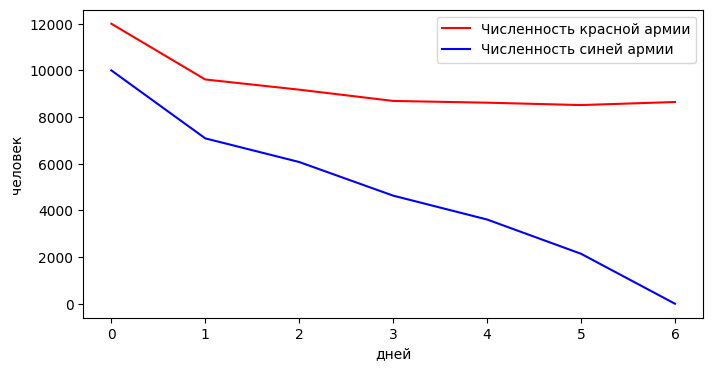

In [50]:
plt.figure(figsize=(8, 4))

plt.plot(np.arange(0, len(red_army["size"])), red_army["size"], label="Численность красной армии", color='red')
plt.plot(np.arange(0, len(blue_army["size"])), blue_army["size"], label="Численность синей армии", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

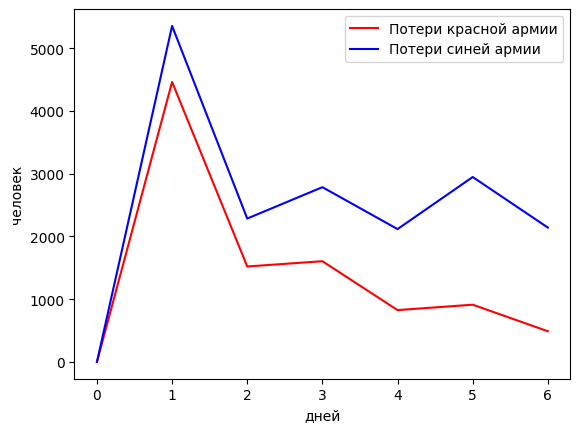

In [51]:
plt.clf()

plt.plot(np.arange(0, len(red_army["losses"])), red_army["losses"], label="Потери красной армии", color='red')
plt.plot(np.arange(0, len(blue_army["losses"])), blue_army["losses"], label="Потери синей армии", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

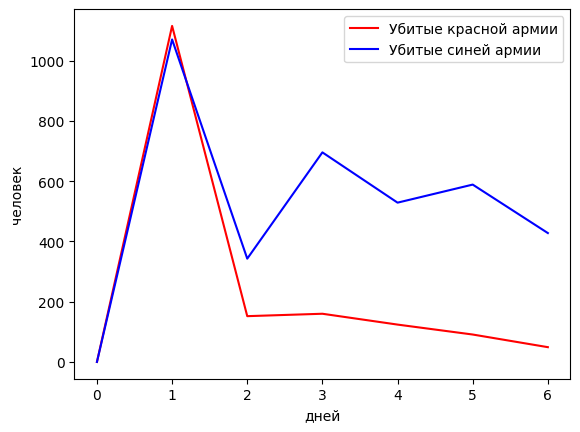

In [52]:
plt.clf()

plt.plot(np.arange(0, len(red_army["killed"])), red_army["killed"], label="Убитые красной армии", color='red')
plt.plot(np.arange(0, len(blue_army["killed"])), blue_army["killed"], label="Убитые синей армии", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

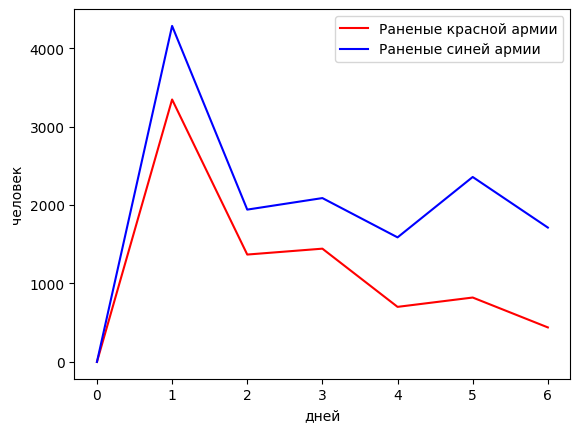

In [53]:
plt.clf()

plt.plot(np.arange(0, len(red_army["wounded"])), red_army["wounded"], label="Раненые красной армии", color='red')
plt.plot(np.arange(0, len(blue_army["wounded"])), blue_army["wounded"], label="Раненые синей армии", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

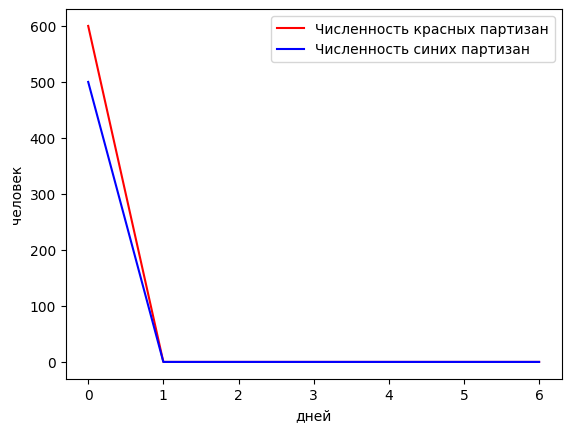

In [54]:
plt.clf()

plt.plot(np.arange(0, len(red_partisans["size"])), red_partisans["size"], label="Численность красных партизан", color='red')
plt.plot(np.arange(0, len(blue_partisans["size"])), blue_partisans["size"], label="Численность синих партизан", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

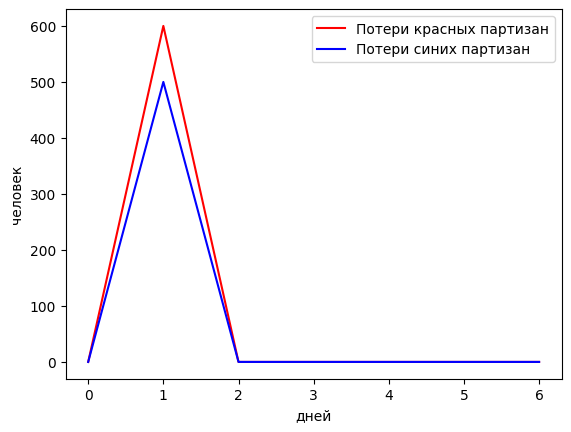

In [55]:
plt.clf()

plt.plot(np.arange(0, len(red_partisans["losses"])), red_partisans["losses"], label="Потери красных партизан", color='red')
plt.plot(np.arange(0, len(blue_partisans["losses"])), blue_partisans["losses"], label="Потери синих партизан", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

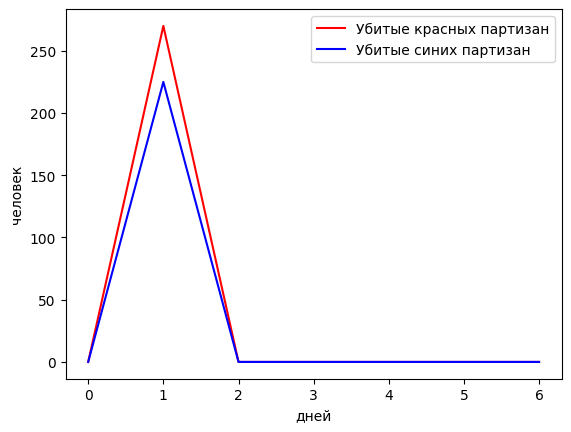

In [56]:
plt.clf()

plt.plot(np.arange(0, len(red_partisans["killed"])), red_partisans["killed"], label="Убитые красных партизан", color='red')
plt.plot(np.arange(0, len(blue_partisans["killed"])), blue_partisans["killed"], label="Убитые синих партизан", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()

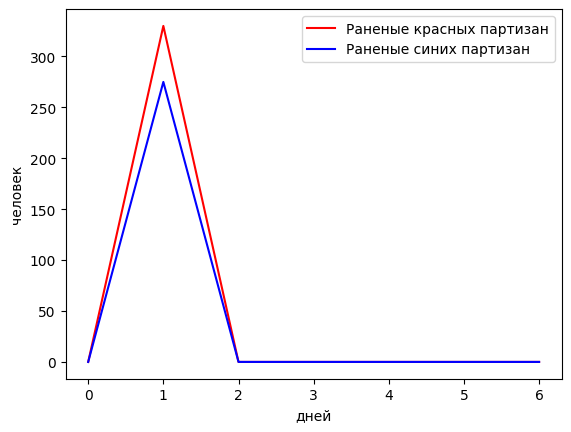

In [57]:
plt.clf()

plt.plot(np.arange(0, len(red_partisans["wounded"])), red_partisans["wounded"], label="Раненые красных партизан", color='red')
plt.plot(np.arange(0, len(blue_partisans["wounded"])), blue_partisans["wounded"], label="Раненые синих партизан", color='blue')

plt.legend()
plt.xlabel('дней')
plt.ylabel('человек')
plt.show()